# Homework Assignment #4 (Individual)
## Regression models

### <p style="text-align: right;"> &#9989; Richard Arbury</p>
### <p style="text-align: right;"> &#9989; arburyri</p>

### Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Performing multiple regression using `statsmodels` and/or `sklearn`
* Understand the metric of a good fit
* Test/Train datasets

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, November 11.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook.


------
<a id="toc"></a>

## Table of contents

1. [Part 1: Git](#part1) (7 points)

2. [Part 2: Multiple Regression](#part3) (42 points)

3. [Part 3: Logistic Regression](#part4) (25 points)

4. [Part 4: Finishing](#conclusion) (3 points)

In [1]:
grades = [7, 42, 25, 3]

print(f"The total grade for this assignment is {sum(grades)}" )

The total grade for this assignment is 77


---
<a id="part1"></a>
[Back to ToC](#toc)

## Part 1: Git (7 points)

For this assignment, you're going to add it to the `cmse202-f22-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Question 1.1 (1 point)**: Navigate to your `cmse202-f22-turnin` **local** repository and create a new directory called `hw-04` and copy this notebook in that new directory.

``` bash
mkdir hw-04

```


&#9989; **Question 1.2 (2 points)**: Before you move on, create a new branch called `hw04_branch` and move into it. In the cell below put the command(s) to create a new branch and to checkout the new branch. (_Note_: your TA will be able to see if you have created the branch and its history).

``` bash
git checkout -b hw04_branch

```

&#9989; **Question 1.3 (3 points):**
Add your name and GitHub username to the top of the notebook, then add and commit **ONLY** the notebook.

``` bash
git commit -m "check1" 
```

What is the commit message you used ?

``` bash
check1
```

&#9989; **Question 1.4 (1 point):** Finally push the updated notebook to GitHub.

``` bash
git push --set-upstream origin hw04_branch
```


**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f22-turnin`" repository inside the `hw-04` directory that you just created within the new branch `hw04-branch`.

In [31]:
# Run this cell before moving on
%pylab
%matplotlib inline
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

sns.set_context("talk")

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


---
<a id="part2"></a>
[Back to ToC](#toc)

## Part 2: Mulitple Regression (42 points)

In this part of the homework, you will work with data from the California Housing Prices dataset. Our goal is to use ordinary least squares to design a linear model to fit the median house value in a California census district given eight features. We will try both a linear model using all the provided features, as well as a reduced linear model which only uses a subset of the features. 

&#9989;  **Question 2.1 (1 points)**: **Do This:** Download the file `housing.csv` from the link below, and save it into the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the file.** If you did not use a command line tool to download the file, write down the command(s) that would have downloaded the file.

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv`

In [3]:
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1454k  100 1454k    0     0  34.6M      0 --:--:-- --:--:-- --:--:-- 34.6M


&#9989;  **Question 2.2 (2 points)**: **Do This:** To get started, read in the `housing.csv` dataset into a Pandas DataFrame, and then display some of its rows.

In [18]:
df=pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200,NEAR BAY


&#9989;  **Question 2.3 (2 points)**: You should notice that the DataFrame has a non-numerical feature called "ocean_proximity". There are also a few rows with `NaN` values, although you may not see them in the few rows that were displayed. **Do This:** **Drop the "ocean_proximity" column from the dataframe, and drop all the rows with `NaN` values.** Note that we will not use the "ocean_proximity" column or any of the rows with `NaN` values in this assignment.

In [19]:
df=df.drop(["ocean_proximity"],axis=1)

In [20]:
df=df.dropna()

&#9989;  **Question 2.4 (6 points)**: **Do This:** Using the `OLS()` method in `statsmodels.api`, make an ordinary least squares model that predicts "median_house_value" using the other features and display the `.summary()` of that process. **Be sure to use the `add_constant()` method to add a column of ones to the DataFrame before using the `OLS()` method so that your linear model includes a constant term.**

In [21]:
columns=["longitude","latitude","housing_median_age","avg_rooms","avg_bedrooms","population","households","median_income"]
x=df[columns]
y=df["median_house_value"]

model=sm.OLS(y,x)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          2.325e+04
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                        0.00
Time:                        19:59:14   Log-Likelihood:                     -2.5823e+05
No. Observations:               20433   AIC:                                  5.165e+05
Df Residuals:                   20425   BIC:                                  5.165e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude          -1991.4625    109.918    -18.118      0.000   -2206.911   -1776.013
latitude           -7820.3760    346.713    -22.556      0.000   -8499.962   -7140.790
housing_median_age  1749.1852     44.881     38.974      0.000    1661.215    1837.155
avg_rooms          -1.355e+04    601.249    -22.534      0.000   -1.47e+04   -1.24e+04
avg_bedrooms        6.548e+04   2915.182     22.461      0.000    5.98e+04    7.12e+04
population           -42.8960      1.112    -38.567      0.000     -45.076     -40.716
households           143.3193      3.311     43.282      0.000     136.829     149.810
median_income       4.878e+04    413.954    117.838      0.000     4.8e+04    4.96e+04
==============================================================================
Omnibus:                     4729.150   Durbin-Watson:                   0.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19042.265
Skew:                           1.100   Prob(JB):                         0.00
Kurtosis:                       7.187   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989;  **Question 2.5 (6 points)**: **Answer These Questions:** 
1. Based on the output of the OLS summary, does this linear model appear to be a good fit? 
2. Which of these features appear to be "significant" in predicting the "median_house_value"?

1. R^2 is high so yes the model is a good "fit". But are F-statitic is 0, so we have 0 explained variance. Skewness is above one so the distrubtion is very un-symmetrical. Kurtosis is way above one, the distrubtion is also very very peaked.

2. Population, Households, and housing_median_avg have the lowest Standard Error, so these variables.

&#9989;  **Question 2.6 (4 points)**: A student from U of M managed to enroll in this class (don't ask us how) and is working on this homework. They got the following output when they used the `OLS()` method in `statsmodels.api`. 

<img src="https://i.ibb.co/pnvcKQ2/Perfect-Model.png" width="400px" border="0">

When you compare outputs, the Wolverine tells you "My linear model is better than yours because my linear model has a larger $R^2$-value than your model. I guess Wolverines are way better than Spartans at data science."

**Answer These Questions:** 
1. How did they get a linear model with a near perfect $R^2$-value? 
2. Is their model actually better than yours? 

Justify your answers.

1. Well considering they included the predicted variable in their model, it would be concerning if they didn't get a perfect fit. 

2. No, it doesn't predict anything. The full data set is and there by the actual formulas used to compute OLS Regression it would have to be perfect. In fact below I ran the same thing but added median_house_value and removed several predictor variables. R^2 still comes out perfect no matter what.



In [32]:
columns1=["avg_rooms","population","households","median_house_value"]
x1=df[columns1]
y1=df["median_house_value"]

model1=sm.OLS(y1,x1)
results1=model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.805e+33
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:11:52   Log-Likelihood:                      4.2325e+05
No. Observations:               20433   AIC:                                 -8.465e+05
Df Residuals:                   20429   BIC:                                 -8.465e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
avg_rooms           2.474e-11   5.36e-13     46.162      0.000    2.37e-11    2.58e-11
population         -1.189e-14   3.62e-15     -3.281      0.001    -1.9e-14   -4.79e-15
households         -8.236e-14   1.09e-14     -7.572      0.000   -1.04e-13    -6.1e-14
median_house_value     1.0000   1.37e-17    7.3e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                    19170.595   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5711064.086
Skew:                          -3.838   Prob(JB):                         0.00
Kurtosis:                      84.542   Cond. No.                     7.43e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989;  **Question 2.7 (2 points)**: **Answer This:** Use `plot_regress_exog` to examine the fits to the data, using `latitude` as the independent variable. Notice that the predicted data points don’t follow a linear trend (I.e., a straight line). Describe the trend you see. 

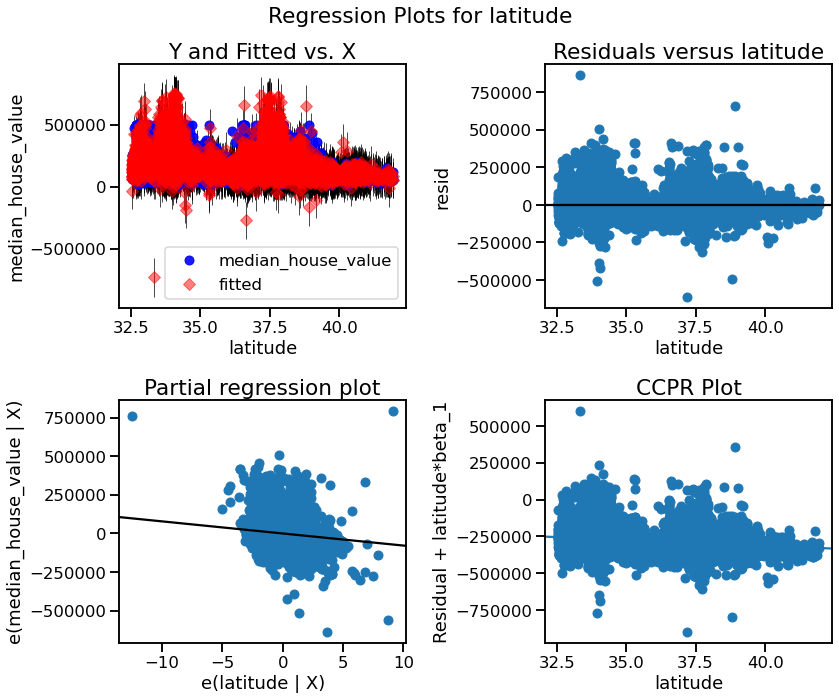

In [41]:
fig = plt.figure(figsize=(12, 10))
sm.graphics.plot_regress_exog(results, 'latitude', fig=fig)
plt.show()

The trend appears to be non-linear. But theres a lot less correlation  when using latitude as the independent in the linear sense. 


&#9989;  **Question 2.8 (1 points)**: **Answer This:** Explain why the best fit values don’t follow a straight line. Is this a linear model (I.e., with depdence on `latitude`, but no dependence on `latitude`^2, `latitude`^3, etc.)? Be as detailed as possible. 

Some of the varibles correlate,multicollinearity, too heavily to each other. I could fix this by running auxillary regressions, or if I knew how, trying non-linear regressions. We also have a lot of variables for a linear regression model.


&#9989;  **Question 2.9 (6 points)**: In the output of the OLS summary, you should have seen a note that says something like 

"The condition number is large, [[number]]. This might indicate that there are strong multicollinearity or other numerical problems." 

Multicollinearity is a statistical phenomenon where some of the features in a model can be linearly predicted using some of the other features in the model. In other words, the features in the model are somewhat redundant. Hence, even if each feature may be deemed significant, it may still be possible to form a "reduced" model using a smaller number of features. 

**Do This:** Design a second linear model that uses a subset of the eight features to predict the "median_house_value", and fits the data comparably well as the first linear model you designed in Question 3.4. You can choose this subset either by trial and error, or by any other method you'd like.

In [60]:
columns=["population","housing_median_age","households","longitude"]
x2=df[columns]
y2=df["median_house_value"]

model2=sm.OLS(y2,x2)
results2=model2.fit()
results2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.777
Model:                            OLS   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                          1.776e+04
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                        0.00
Time:                        22:58:56   Log-Likelihood:                     -2.6655e+05
No. Observations:               20433   AIC:                                  5.331e+05
Df Residuals:                   20429   BIC:                                  5.331e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
population           -46.2351      1.644    -28.118      0.000     -49.458     -43.012
housing_median_age  1157.5884     65.574     17.653      0.000    1029.057    1286.119
households           155.9229      4.893     31.869      0.000     146.333     165.513
longitude          -1352.4438     21.411    -63.167      0.000   -1394.410   -1310.477
==============================================================================
Omnibus:                     2334.302   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3213.090
Skew:                           0.932   Prob(JB):                         0.00
Kurtosis:                       3.545   Cond. No.                         167.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

&#9989;  **Question 2.10 (4 points)**: **Answer This:** How did your reduced linear model fit the data compared to the full linear model you created in Question 3.4? Give some quantitative justification for this answer.

I took the four variables with the lowest SE. The R^2 is a little lower, but still high. The skewness is much better and the kurtosis was greatly reduced (still not great). I also lost the multicollinearity error and got the F-stat well above zero. So overall I'd say this model is much better.


&#9989;  **Question 2.11 (2 points)**: **Answer This:** Now that you have your reduced model, make a heat map showing the correlations between the different variables (similar to what we did on Day 14).

<AxesSubplot:>

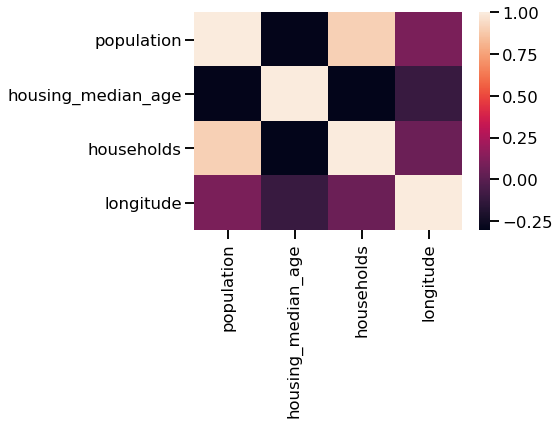

In [67]:
df1=df[columns]


sns.heatmap(df1.corr())

&#9989;  **Question 2.12 (4 points)**: **Answer This:** You should find that there isn’t much overlap between the high-correlation variables in the heat map and the variables you used in your (reduced)  model, the opposite of what we found on Day 14. Explain why this is the case.

The variables here don't correlate very highly to each other, because we took out the variables cause multicollinearity


---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete" 

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3. Logistic Regression (25 points)

In this part of the homework, you will work with data from an unknown source. Our goal is to use logistic regression to identify who is more likely to buy merchandise from ads on social networks.

&#9989;  **Question 3.1 (4 points)**: 

1. **Do This:** Download the dataset and write the command you used in the next cell

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv`
    
2. **Do This:** Load the data in this file into a `Pandas` dataframe
3. **Do This:** Display the first **five** rows of the dataframe. 

In [ ]:
# Put the command to download the data here 


In [ ]:
# Put your code for reading in the dataset here


As you can see the dataset has only few columns. The first columns is not useful since it is a unique identifier. The second column could be useful, however, we need numbers instead of strings. Hence we are left only with the last three columns. `Age` and `EstimatedSalary` will be our features while `Purchased` will be our labels 

&#9989;  **Question 3.2 (3 points)**: 

1. **Do This:** Drop the first and second columns of the dataset    
2. **Do This:** Divided the rest of the dataset into a train and a test dataset using `train_test_split` function of `scikit-learn`. The test dataset should be 25% of the original data


In [ ]:
# Put your code here


&#9989;  **Question 3.3 (4 points)**: 

1. **Do This:** Use the `Logit` class to perform Logistic regression on your training dataset (don't forget to add the constant).
2. **Do This:** Print the results of your model


In [14]:
# Put your code here

&#9989;  **Question 3.4 (2 points)**: Do you think this is a good fit? Explain your answer


     Write your answer here

&#9989;  **Question 3.5 (4 points)**: Use the above model to make predictions on the test dataset. Remember that the `Logit` model returns continuous values from 0 to 1 while you need two discrete values. Then use the function `accuracy_score` from `scikit-learn` to see how good your model is.

In [ ]:
# Put your code here

&#9989;  **Question 3.6 (1 point)**: Does the accuracy score change your opinion of the goodness of your model?


    write your answer here

&#9989;  **Question 3.7 (5 points)**: Does your model improve if you re-introduce the `Gender` column? Since the column is made of strings, replace `Male` with 0 and `Female` with 1. Is `Gender` an informative feature?
Explain your answers

In [ ]:
# Put your code here

---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete" 

---

## Part 4. Finishing up (3 points)


It is now time to merge your changes to the main branch and push

&#9989; **Question 4.1 (1 point):** Switch to your main branch

```bash
# Put the command(s) to switch to your main branch
```

&#9989; **Question 4.2 (1 point):** Merge your `hw04-branch`

```bash
# Put the command(s) to merge your branch
```

&#9989; **Question 4.3 (1 point):** Finally push the changes to GitHub

```bash
# Put the command(s) to push your new main branch
```

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/TMrrP0WnVM" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #4, and upload it there.

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University